# Homework #1 - Basic Statistics

**In this assignment, you are going to solve some basic statistical problems like estimating parameters of a distribution. In each problem, you are instructed to write little chunks of Python code. Additionally, there are few questions that you have to answer based on your observations and your knowledge of statistics.**

**Ultimately, you are expected to submit your solutions as a single jupyter notebook, *not a python script or anything else.***

**In the case of any questions, post it on the Q&A forum.**

Good Luck

In [153]:
import numpy as np
import matplotlib.pyplot as plt

from dists import *
import math
import pandas as pd
import scipy.stats as st
from scipy.stats import ttest_ind
from scipy import stats

# Problem #1 - Parameter Estimation

**A) By calling `my_kappa(n_sample, student_id)`, draw a sample of size 100 from `my_kappa` distribution.**

In [154]:
mk = my_kappa(100, 21365527)
mk

array([  1.71436954,   7.71691239,  11.57746907,  -6.39322243,
        12.21288867,  -6.20660147,  -8.15136592,   7.67359352,
        10.11668093,   8.81675916,   5.70714916,  -1.3048551 ,
         0.88319766,   9.57226988,  -0.90665768,   7.90733537,
        -1.19407403,  -8.5721901 ,  -0.23050803,  -6.74297811,
        -8.57854497,  -7.57627994,  -9.280536  ,   3.09057764,
        -2.70013502,   8.2849918 ,   2.29657481,   7.69915323,
        -4.45895324,   6.30391804, -12.3388436 , -12.07596802,
         8.83375293,  -8.62681534,   6.96621702,   0.76189248,
        -7.94988899,   8.02752776,  -5.93062326,   8.84908951,
        -8.00426113,  14.5023701 ,  -2.45037688,   6.15641389,
        -7.29534279,  -6.8311875 ,  -8.34284055,  -8.39087282,
         8.33280189,  -5.59197151,  -9.9124111 ,  13.44861903,
        -8.54857077, -11.30258733,  -3.28855158,   1.26472477,
        -1.64950893,   5.10147453,  -1.69196076,  -1.19772595,
        -0.87784832,  -9.64350062,  -8.32340112,   7.48

**B) Calculate and print the mean of the sample you've just drawn.**

In [155]:
mean = np.mean(mk)
mean

0.24202670134348422

**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**

In [156]:
# calculate unbiased std with bulit in func in numpy
np.std(mk, ddof=1)

7.205642888454561

In [157]:
# calculate unbiased std without bulit in func in numpy
def unbiased_estimation_std(samples, samples_mean):
    deviations = samples - samples_mean
    squared_deviations = np.power(deviations, 2)
    sum_squared_deviations = np.sum(squared_deviations)
    n = len(mk)
    variance = sum_squared_deviations / (n - 1)
    result = math.sqrt(variance)
    return result
    
ues = unbiased_estimation_std(mk, mean)
ues

7.205642888454561

**D) Answer the following questions.**
- What is an unbiased estimator?
- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?

~ Type your answer here ...


1- In statistics, the bias (or bias function) of an estimator is the difference between this estimator's expected value and the true value of the parameter being estimated. An estimator or decision rule with zero bias is called unbiased.An unbiased estimator is an accurate statistic that’s used to approximate a population parameter. “Accurate” in this sense means that it’s neither an overestimate nor an underestimate. If an overestimate or underestimate does happen, the mean of the difference is called a “bias.” 

2- this is the biased or maximum likelihood estimation of variance: $$S^2_n = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n} $$



 and this is the unbiased estimation of the variance: $$S^2_{n-1} = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n-1} $$
 
1) As we know sample mean is always going to sit inside sample. 2) There is a possibility that when we take our sample, our true population mean be outside of sample.

So we're likely to understmate the true population varaince because if we calculate the distance of each point to sample mean to obtain variance, this is going to be much lower estimate than the true variance. It does turn out that if we just divide by n-1 instead of dividing by n, we'll get a slightly larger sample variance so its a better estamtion.

**E) Now, draw 100 samples of size 30 and calculate the mean value for each sample. Draw the histogram of these mean values. Does this histogram resemble any familiar probability distribution function? Why?**

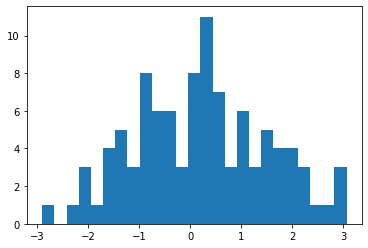

In [169]:
means = []
for i in range(100):
    mk = my_kappa(30, 21365527)
    mean = np.mean(mk)
    means.append(mean)
    
plt.hist(means, bins=25);

In [170]:
mean = np.mean(means)
median = np.median(means)
print("Mean of data: ", mean)
print("Median of data: ", median)


left = 0
right = 0

for element in means:
    if element < mean:
        left += 1
    elif element > mean:    
        right += 1

print("Number of data is to the left of center: ", left)
print("Number of data is to the right of center: ", right)

Mean of data:  0.20704706335514214
Median of data:  0.22929750737485796
Number of data is to the left of center:  49
Number of data is to the right of center:  51


The distribution of this histogram is similar to the normal distribution. Because it seems the mean and median are almost equal. Also the curve is symmetric at the center (i.e. around the mean). About half of the values are to the left of center and half the values are to the right.
But I think if we draw more samples we can see these properties more clear. 

# Problem #2 - Confidence Interval

**A) Load slot_machine.csv dataset using pandas package. This file contains the data recorded from playing a slot machine for 1000 rounds. Each row in the dataset contains the outcome for a reel of the machine as well as the amount of prize won at that round.**

In [171]:
df = pd.read_csv('slot_machine.csv')
df

,reel1,reel2,reel3,prize
0,Apple,Apple,Apple,28.762213
1,Orange,Apple,Apple,24.541182
2,Apple,Orange,Apple,19.761514
3,Banana,Orange,Apple,9.161757
4,Orange,Apple,Banana,20.491971
...,...,...,...,...
995,Apple,Orange,Apple,21.116380
996,Orange,Apple,Banana,19.373564
997,Orange,Apple,Banana,19.743847
998,Banana,Orange,Apple,13.347939


**B) Plot the histogram of the prizes won in all rounds.**

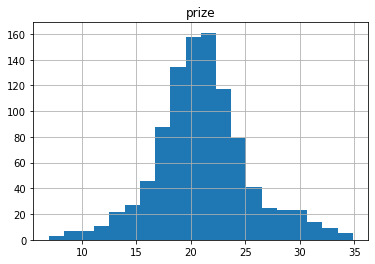

In [172]:
df.hist('prize', bins=20);

**C) Assuming that the amount of prize won in each round is a Gaussian random variable with different parameters for each combination of outcomes, construct a 95% confidence interval for the rounds that the outcome is *"Banana, Banana, Apple"*.**

In [173]:
bba = df.loc[(df['reel1'] == 'Banana') & (df['reel2'] == 'Banana') & (df['reel3'] == 'Apple')]
bba

,reel1,reel2,reel3,prize
19,Banana,Banana,Apple,23.676867
45,Banana,Banana,Apple,24.872046
56,Banana,Banana,Apple,19.826360
65,Banana,Banana,Apple,23.549959
144,Banana,Banana,Apple,24.169330
161,Banana,Banana,Apple,25.401995
182,Banana,Banana,Apple,21.082397
222,Banana,Banana,Apple,21.095614
270,Banana,Banana,Apple,23.459528
315,Banana,Banana,Apple,17.614501


In [174]:
bba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 19 to 968
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   reel1   28 non-null     object 
 1   reel2   28 non-null     object 
 2   reel3   28 non-null     object 
 3   prize   28 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [186]:
# number of sample < 30. So we use t table and use 'st.t.interval' to calculate confidence interval
st.t.interval(alpha=0.95, df=len(bba['prize'])-1, loc=np.mean(bba['prize']), scale=st.sem(bba['prize']))

(22.049765145511802, 23.9169793455735)

**D) Now, repeat the procedure in part C for *"Orange, Orange, Orange"* and *"Orange, Apple, Banana".***

In [187]:
ooo = df.loc[(df['reel1'] == 'Orange') & (df['reel2'] == 'Orange') & (df['reel3'] == 'Orange')]
ooo

,reel1,reel2,reel3,prize
25,Orange,Orange,Orange,28.019898
33,Orange,Orange,Orange,27.568121
36,Orange,Orange,Orange,26.305575
85,Orange,Orange,Orange,26.946992
118,Orange,Orange,Orange,26.031058
132,Orange,Orange,Orange,23.762774
174,Orange,Orange,Orange,28.210873
188,Orange,Orange,Orange,27.660522
211,Orange,Orange,Orange,28.024893
216,Orange,Orange,Orange,25.408230


In [188]:
ooo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 25 to 972
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   reel1   36 non-null     object 
 1   reel2   36 non-null     object 
 2   reel3   36 non-null     object 
 3   prize   36 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.4+ KB


In [189]:
# number of sample >= 30. So we use z score and use 'st.norm.interval' to calculate confidence interval
st.norm.interval(0.95, loc=np.mean(ooo['prize']), scale=st.sem(ooo['prize']))

(26.6933440450992, 27.620218377688975)

In [190]:
oab = df.loc[(df['reel1'] == 'Orange') & (df['reel2'] == 'Apple') & (df['reel3'] == 'Banana')]
oab

,reel1,reel2,reel3,prize
4,Orange,Apple,Banana,20.491971
29,Orange,Apple,Banana,20.416871
52,Orange,Apple,Banana,17.402426
147,Orange,Apple,Banana,13.490953
162,Orange,Apple,Banana,10.658358
178,Orange,Apple,Banana,13.504262
181,Orange,Apple,Banana,15.591014
190,Orange,Apple,Banana,16.147632
214,Orange,Apple,Banana,14.638042
227,Orange,Apple,Banana,21.380169


In [191]:
oab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 4 to 997
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   reel1   47 non-null     object 
 1   reel2   47 non-null     object 
 2   reel3   47 non-null     object 
 3   prize   47 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [192]:
# number of sample >= 30. So we use z score and use 'st.norm.interval' to calculate confidence interval
st.norm.interval(0.95, loc=np.mean(oab['prize']), scale=st.sem(oab['prize']))

(16.215085506417765, 18.161192047241002)

**D) Answer the following questions.**
- What is a confidenve interval?
- Interpret the results of part C. What does the computed confidence interval mean?
- Is there any noticable difference between the average prize for "Banana, Banana, Apple" and "Oragne, Orange, Orange"? Why?
- Is there any noticable difference between the average prize for "Orange, Orange, Orange" and "Oragne, Apple, Banana"? Why?

~Type your answer here ...

1- The confidence interval (CI) is a range of values that’s likely to include a population value with a certain degree of confidence. It is often expressed as a % whereby a population mean lies between an upper and lower interval.

2- It is the interval that we are 95% conficent will contain the true unknown value of the population mean. If we were to take lots of samples of n and create 95% confidence intervals from them, we would expect 95% of them contain the true population mean. However about 5% of them will not contain the true population mean. for example we can 95% be sure that the mean value of prize for outcome of "Banana, Banana, Apple" is somewhere between (22.049765145511802, 23.9169793455735)

In [201]:
# answer to question 3
# null hypothesis: the two means are equal
# alternative hypothesis: the two means are not equal

def compare_2_group(arr1, arr2, alpha):
    stat, p = ttest_ind(arr1, arr2)
    print('Statistic=', stat, ', p=', p)
    if p > alpha:
        print('There is not any noticable difference between the average prizes. Because p-value is higher than significance level.')
        
    else:
        print('There is a noticable difference between the average prizes. Because p-value is lower than significance level.')
        
        
compare_2_group(bba['prize'], ooo['prize'], 0.05)

Statistic= -8.656605866866196 , p= 2.8938160620011483e-12
There is a noticable difference between the average prizes. Because p-value is lower than significance level.


In [202]:
# answer to question 4
compare_2_group(ooo['prize'], oab['prize'], 0.05)

Statistic= 16.491577085402003 , p= 1.2929370302991068e-27
There is a noticable difference between the average prizes. Because p-value is lower than significance level.


# Problem #3 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average value of a random variable. In contrast with previous problems, you are going to estimate that value over time. To observe a single realization of this random variable, call `my_normal(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_omicron distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should be similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

In [194]:
def construct_conf_interval(data, alpha):
    if len(data) < 30:
        interval = st.t.interval(alpha=alpha, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))
    elif len(data) >= 30:
        interval = st.norm.interval(alpha=alpha, loc=np.mean(data), scale=st.sem(data))
    return interval

In [197]:
samples = []
means = []
intervals = []

for i in range(100):
    sample = my_normal(21365527)
    samples.append(sample)
    means.append(np.mean(samples))
    
    interval = construct_conf_interval(samples, 0.95)
    intervals.append(interval)
    
samples_arr = np.array(samples)
samples_means = np.array(means)
samples_intervals = np.array(intervals)

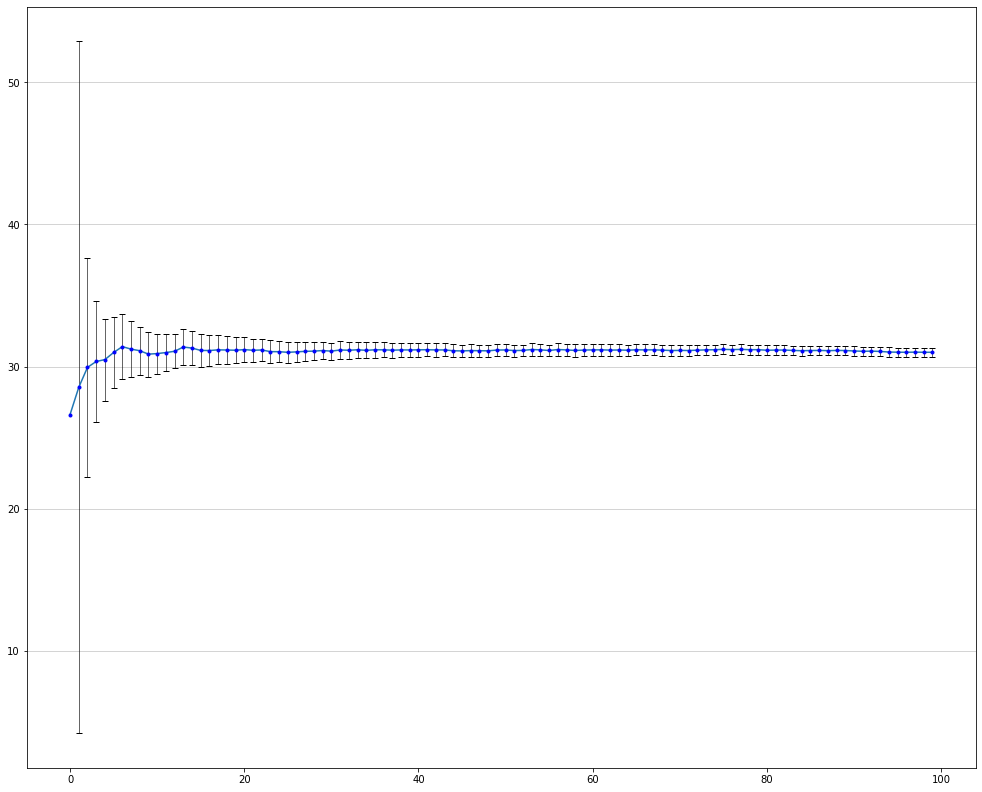

In [200]:
x = np.arange(100)
plt.figure(figsize=(17, 14))
plt.grid(True, linewidth=0.5, axis='y',color='#AAAAAA', linestyle='-')
plt.plot((x,x),([low for (low,high) in intervals], [high for (low,high) in intervals]), c='black', linewidth=0.6);
plt.plot(x, samples_means);
plt.plot(x, samples_means, 'b.');
plt.plot(x, [low for (low,high) in intervals], 'k_');
plt.plot(x, [high for (low,high) in intervals], 'k_');

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

The estimated mean will approach to the true mean because sample size approachs to population size. The confidence interval will be smaller. According to the confidence interval formula, as we have more sample we will have larger denominator in fraction and as a result, the confidence interval will be smaller.